### Imports

In [1]:
import numpy as np
import biotuner
from biotuner.biotuner_utils import *
from biotuner.biotuner_object import *
from biotuner.biotuner2d import *
import matplotlib.pyplot as plt
import os
import time
import warnings
warnings.filterwarnings('ignore', category=DeprecationWarning)
warnings.filterwarnings('ignore', category=RuntimeWarning)
warnings.filterwarnings('ignore', category=FutureWarning)
warnings.filterwarnings('ignore', category=UserWarning)

pygame 2.1.2 (SDL 2.0.18, Python 3.8.15)
Hello from the pygame community. https://www.pygame.org/contribute.html


# Peaks extraction methods

This notebook illustrates the use of the *biotuner* toolbox with the aims to show that we can retrieve harmonic information from a generated signal using different peaks extraction methods

This notebook is one step towards the exploration of biological harmonies and their relevance for the carving of new musical systems, as compared to pseudo-random generative engines.

### Retrieving frequency information from simulated signals using the biotuner

First, we need will generate two signals composed of a two sets of predetermined frequencies. The first one will contain harmonic frequencies, while the second will contain non-harmonic frequencies

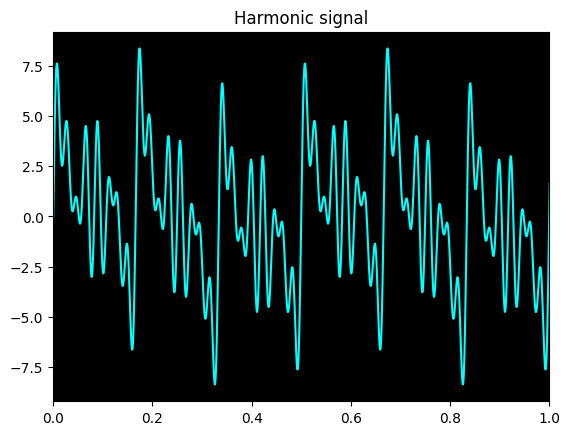

(0.0, 1.0)

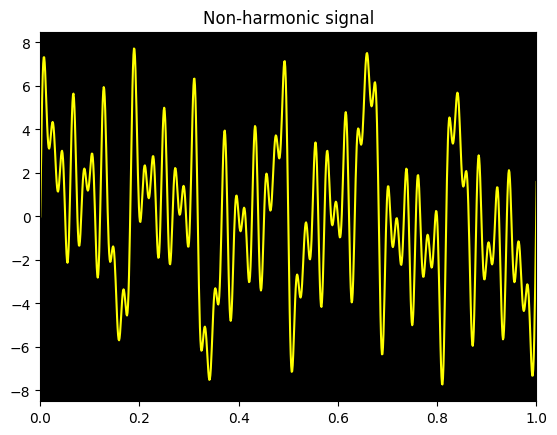

In [19]:
from biotuner.biotuner_utils import generate_signal

sf = 1000
length =4
theta = 0
freqs_harm = [2, 6, 12, 18, 24, 36, 48]
freqs_noharm = [2, 5, 11, 17, 23, 33, 49]
amps = [1, 2, 2, 2, 1, 2, 2, 2, 2]
    
signal_harm = generate_signal(sf, length, freqs_harm, amps, show=True, color = 'cyan')
plt.title('Harmonic signal')
plt.xlim(0, 1)
plt.show()
signal_noharm = generate_signal(sf, length, freqs_noharm, amps, show=True, color = 'yellow')
plt.title('Non-harmonic signal')
plt.xlim(0, 1)

Then, we want to retrieve the generator frequencies using different peaks_functions offered by the *biotuner*.

#### Peaks functions ([see the doc](https://github.com/AntoineBellemare/biotuner/blob/main/biotuner/biotuner_object.py))

'fixed' : ranges of frequency bands are fixed

'EMD': Intrinsic Mode Functions (IMFs) are derived from Empirical Mode Decomposition (EMD)  
                   FFT is computed on each IMF
                   
                    
'HH1D_max': maximum values of the 1d Hilbert-Huang transform on each IMF using EEMD.

'harmonic_recurrence': keeps peaks for which a maximum of other peaks are harmonics

'cepstrum': peak frequencies of the cepstrum (inverse Fourier transform (IFT) of the logarithm of the estimated signal spectrum)

'FOOOF' : peaks rising above the aperiodic component

### Harmonic reccurence

In [3]:
# Initialize biotuner object for harmonic signal
bt_harm = compute_biotuner(sf=sf, peaks_function = 'harmonic_recurrence', precision = 0.5) 

# Extract spectral peaks
bt_harm.peaks_extraction(signal_harm, min_freq = 1, max_freq = 50, min_harms = 2, harm_limit = 1000)

# Initialize biotuner object for non-harmonic signal
bt_noharm = compute_biotuner(sf=sf, peaks_function = 'harmonic_recurrence', precision = 0.5) 

# Extract spectral peaks
bt_noharm.peaks_extraction(signal_noharm, min_freq = 1, max_freq = 50, min_harms = 2, harm_limit = 1000)

# Compare results
print('HARMONIC PEAKS', '\nRETRIEVED', bt_harm.peaks, 'ORIGINAL', freqs_harm)
print('NON-HARMONIC PEAKS', '\nRETRIEVED', bt_noharm.peaks, 'ORIGINAL', freqs_noharm)

Number of peaks : 5
Number of peaks : 5
HARMONIC PEAKS 
RETRIEVED [36. 48.  6. 12. 18.] ORIGINAL [2, 6, 12, 18, 24, 36, 48]
NON-HARMONIC PEAKS 
RETRIEVED [11. 17.  5. 33. 23.] ORIGINAL [2, 5, 11, 17, 23, 33, 49]


### FOOOF

In [4]:
# Initialize biotuner object for harmonic signal
bt_harm = compute_biotuner(sf=sf, peaks_function = 'FOOOF', precision = 0.5) 

# Extract spectral peaks
bt_harm.peaks_extraction(signal_harm, min_freq = 1, max_freq = 50, min_harms = 2, harm_limit = 1000)

# Initialize biotuner object for non-harmonic signal
bt_noharm = compute_biotuner(sf=sf, peaks_function = 'FOOOF', precision = 0.5) 

# Extract spectral peaks
bt_noharm.peaks_extraction(signal_noharm, min_freq = 1, max_freq = 50, min_harms = 2, harm_limit = 1000)

# Compare results
print('HARMONIC PEAKS', '\nRETRIEVED', bt_harm.peaks, 'ORIGINAL', freqs_harm)
print('NON-HARMONIC PEAKS', '\nRETRIEVED', bt_noharm.peaks, 'ORIGINAL', freqs_noharm)

Number of peaks : 5
Number of peaks : 5
HARMONIC PEAKS 
RETRIEVED [ 6. 12.  2. 18. 48.] ORIGINAL [2, 6, 12, 18, 24, 36, 48]
NON-HARMONIC PEAKS 
RETRIEVED [ 5. 17. 11. 49. 33.] ORIGINAL [2, 5, 11, 17, 23, 33, 49]


### Fixed

And now with the **'fixed'** bands method. With the specified bands, we would expect to find *2, 6* and *24Hz* for the harmonic signal and *2, 5* and *23Hz* for the non-harmonic signal

In [5]:
FREQ_BANDS = [[1, 3], [4, 7], [20, 30]]
# Initialize biotuner object for harmonic signal
bt_harm = compute_biotuner(sf=sf, peaks_function = 'fixed', precision = 0.5) 

# Extract spectral peaks
bt_harm.peaks_extraction(signal_harm, FREQ_BANDS = FREQ_BANDS, min_freq = 1, max_freq = 50, min_harms = 2, harm_limit = 1000)

# Initialize biotuner object for non-harmonic signal
bt_noharm = compute_biotuner(sf=sf, peaks_function = 'fixed', precision = 0.5) 

# Extract spectral peaks
bt_noharm.peaks_extraction(signal_noharm, FREQ_BANDS = FREQ_BANDS, min_freq = 1, max_freq = 50, min_harms = 2, harm_limit = 1000)

# Compare results
print('HARMONIC PEAKS', '\nRETRIEVED', bt_harm.peaks, 'ORIGINAL', freqs_harm)
print('NON-HARMONIC PEAKS', '\nRETRIEVED', bt_noharm.peaks, 'ORIGINAL', freqs_noharm)

Number of peaks : 3
Number of peaks : 3
HARMONIC PEAKS 
RETRIEVED [ 2.  6. 24.] ORIGINAL [2, 6, 12, 18, 24, 36, 48]
NON-HARMONIC PEAKS 
RETRIEVED [ 2.  5. 23.] ORIGINAL [2, 5, 11, 17, 23, 33, 49]


### Empirical Mode Decomposition

In [6]:
# Initialize biotuner object for harmonic signal
bt_harm = compute_biotuner(sf=sf, peaks_function = 'EMD', precision = 0.5) 

# Extract spectral peaks
bt_harm.peaks_extraction(signal_harm, min_freq = 1, max_freq = 50, min_harms = 2, harm_limit = 1000)

# Initialize biotuner object for non-harmonic signal
bt_noharm = compute_biotuner(sf=sf, peaks_function = 'EMD', precision = 0.5) 

# Extract spectral peaks
bt_noharm.peaks_extraction(signal_noharm, min_freq = 1, max_freq = 50, min_harms = 2, harm_limit = 1000)

# Compare results
print('HARMONIC PEAKS', '\nRETRIEVED', bt_harm.peaks, 'ORIGINAL', freqs_harm)
print('NON-HARMONIC PEAKS', '\nRETRIEVED', bt_noharm.peaks, 'ORIGINAL', freqs_noharm)

Number of peaks : 5
Number of peaks : 5
HARMONIC PEAKS 
RETRIEVED [ 0.5  0.5  2.   6.  18. ] ORIGINAL [2, 6, 12, 18, 24, 36, 48]
NON-HARMONIC PEAKS 
RETRIEVED [ 2.  3.  5. 11. 17.] ORIGINAL [2, 5, 11, 17, 23, 33, 49]


### HH1D_max

In [7]:
# Initialize biotuner object for harmonic signal
bt_harm = compute_biotuner(sf=sf, peaks_function = 'HH1D_max', precision = 0.5) 

# Extract spectral peaks
bt_harm.peaks_extraction(signal_harm, min_freq = 1, max_freq = 50, min_harms = 2, harm_limit = 1000)

# Initialize biotuner object for non-harmonic signal
bt_noharm = compute_biotuner(sf=sf, peaks_function = 'HH1D_max', precision = 0.5) 

# Extract spectral peaks
bt_noharm.peaks_extraction(signal_noharm, min_freq = 1, max_freq = 50, min_harms = 2, harm_limit = 1000)

# Compare results
print('HARMONIC PEAKS', '\nRETRIEVED', bt_harm.peaks, 'ORIGINAL', freqs_harm)
print('NON-HARMONIC PEAKS', '\nRETRIEVED', bt_noharm.peaks, 'ORIGINAL', freqs_noharm)

Number of peaks : 5
Number of peaks : 5
HARMONIC PEAKS 
RETRIEVED [ 0.77  0.8   1.97  6.24 14.69] ORIGINAL [2, 6, 12, 18, 24, 36, 48]
NON-HARMONIC PEAKS 
RETRIEVED [ 1.4   2.23  4.43 11.36 17.44] ORIGINAL [2, 5, 11, 17, 23, 33, 49]


### CEPSTRUM

In [8]:
# Initialize biotuner object for harmonic signal
bt_harm = compute_biotuner(sf=sf, peaks_function = 'cepstrum', precision = 1) 

# Extract spectral peaks
bt_harm.peaks_extraction(signal_harm, min_freq = 1, max_freq = 50, min_harms = 2, harm_limit = 1000)

# Initialize biotuner object for non-harmonic signal
bt_noharm = compute_biotuner(sf=sf, peaks_function = 'cepstrum', precision = 1) 

# Extract spectral peaks
bt_noharm.peaks_extraction(signal_noharm, min_freq = 1, max_freq = 50, min_harms = 2, harm_limit = 1000)

# Compare results
print('HARMONIC PEAKS', '\nRETRIEVED', bt_harm.peaks, 'ORIGINAL', freqs_harm)
print('NON-HARMONIC PEAKS', '\nRETRIEVED', bt_noharm.peaks, 'ORIGINAL', freqs_noharm)

Number of peaks : 5
Number of peaks : 5
HARMONIC PEAKS 
RETRIEVED [2.  1.  1.2 1.5 3. ] ORIGINAL [2, 6, 12, 18, 24, 36, 48]
NON-HARMONIC PEAKS 
RETRIEVED [ 1.22  5.52 16.39  1.89  1.64] ORIGINAL [2, 5, 11, 17, 23, 33, 49]


#### We will add noise to the signal to see how the algorithms perform

NOISE LEVEL:  0


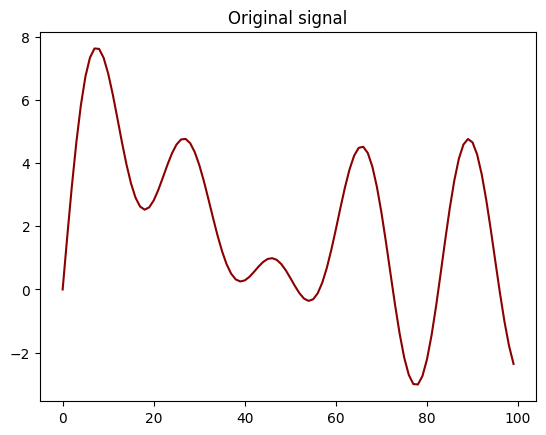

NOISE LEVEL:  5


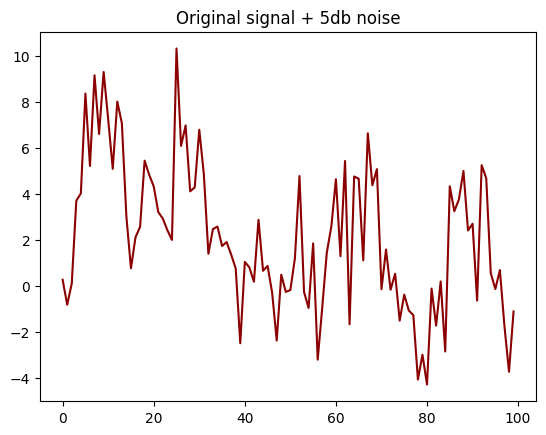

NOISE LEVEL:  10


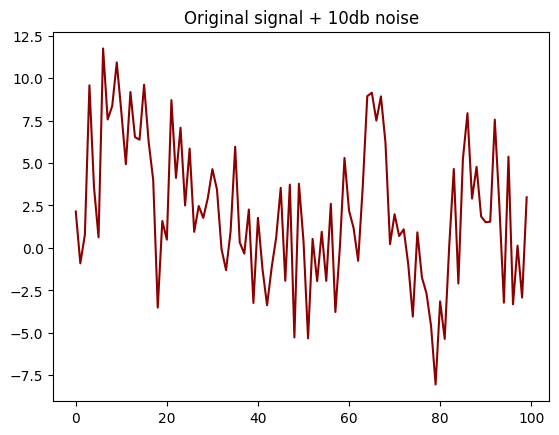

In [9]:
import scipy.signal

# Set a target channel noise power to something very noisy
noise_db_list = range(0, 15, 5)
for db in noise_db_list:
    # Convert to linear Watt units
    target_noise_watts = 10 ** (db / 10)

    # Generate noise samples
    mean_noise = 0
    noise_signal = np.random.normal(mean_noise, np.sqrt(target_noise_watts), len(signal_harm))

    # Noise up the original signal and plot
    noised_signal = signal_harm + noise_signal
    if db == 0:
        plt.plot(signal_harm[0:100], color = 'darkred')
        plt.title('Original signal')
    else:
        plt.plot(noised_signal[0:100], color = 'darkred')
        plt.title('Original signal + {}db noise'.format(str(db)))
    print('NOISE LEVEL: ', db)
    plt.show()

#### We will now quantify the effect of noise on peak detection by plotting the performance of the algorithms for different intensity of noise.

The first plot is for a signal made from a set of harmonic frequencies.

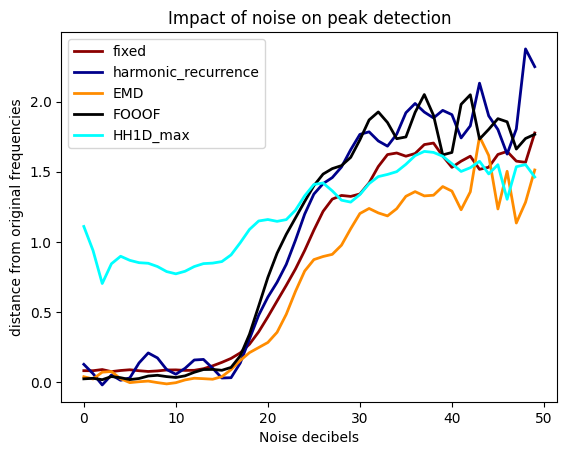

In [17]:
sf = 1000
length = 4
n_times = 20 #number of times the bootstraping is executed
freqs = [8, 16, 18, 24, 30, 32]
amps = [1, 1, 1, 1, 1, 1]
    
signal = generate_signal(sf, length, freqs, amps, show=False, color = 'turquoise')  
FREQ_BANDS = [[4, 8], [8, 15], [15, 20], [20, 26], [26, 31], [31, 40]]

peaks_methods = ['fixed', 'harmonic_recurrence', 'EMD', 'FOOOF', 'HH1D_max']
noise_db_list = range(0, 50, 1)
colors = ['darkred', 'darkblue', 'darkorange', 'black', 'cyan', 'deeppink']
for method, color in zip(peaks_methods, colors):
    avg_distance_tot = []
    for db in noise_db_list: 
        t = 0
        avg_distance = []
        while t < n_times:
            # Convert to linear Watt units
            target_noise_watts = 10 ** (db / 10)

            # Generate noise samples
            mean_noise = 0
            noise_signal = np.random.normal(mean_noise, np.sqrt(target_noise_watts), len(signal))

            # Noise up the original signal and plot
            noised_signal = signal + noise_signal

            # Initialize biotuner object
            biotuning = compute_biotuner(sf = sf, peaks_function = method, precision = 0.5)
            biotuning.peaks_extraction(noised_signal, min_freq = 1, max_freq = 50, min_harms = 2, harm_limit = 128, 
                                       FREQ_BANDS = FREQ_BANDS, verbose=False)
            biotuning.peaks = [x for x in biotuning.peaks if x <= freqs[-1]]
            if db == 0:
                no_noise_peaks = biotuning.peaks
            list_distance = []
            for p in biotuning.peaks:
                takeClosest = lambda num,collection:min(collection,key=lambda x:abs(x-num))
                closest = takeClosest(p,freqs)
                list_distance.append(abs(p-closest))   
            avg_distance.append(np.nanmean(list_distance))
            t += 1
        avg_distance_tot.append(np.nanmean(avg_distance)) 
    z = np.polyfit(noise_db_list, avg_distance_tot, len(noise_db_list))
    p = np.poly1d(z)
    #plt.plot(noise_db_list, p(noise_db_list), avg_distance, "r-o", color = 'darkturquoise')
    plt.plot(noise_db_list, p(noise_db_list), color = color, linewidth=2, label=method)
    #plt.plot(noise_db_list, avg_distance, '--', color = color, linewidth=1)
    
    
plt.xlabel("Noise decibels")
plt.ylabel("distance from original frequencies")
plt.title('Impact of noise on peak detection')
plt.grid = True
#plt.ylim((0,4))
#plt.xlim((0,50))
plt.legend(loc="upper left")
plt.show()





The second plot is for a signal made from a set of inharmonic frequencies.

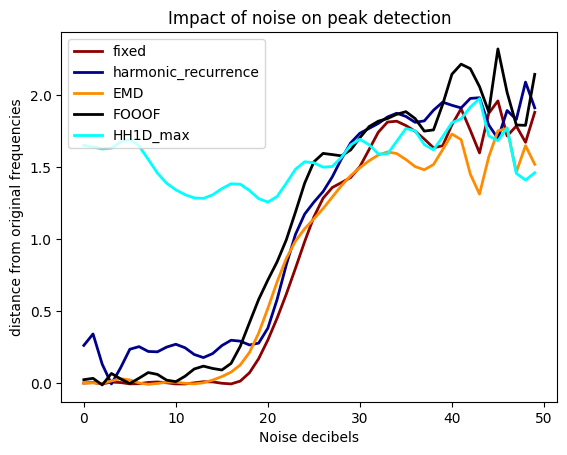

In [13]:
sf = 1000
length = 4
n_times = 20 #number of times the bootstraping is executed
freqs = [4.5, 8.5, 17.5, 21, 30, 39]
amps = [1, 1, 1, 1, 1, 1]
    
signal = generate_signal(sf, length, freqs, amps, show=False, color = 'turquoise')  
FREQ_BANDS = [[4, 8], [8, 15], [15, 20], [20, 26], [26, 31], [31, 40]]

peaks_methods = ['fixed', 'harmonic_recurrence', 'EMD', 'FOOOF', 'HH1D_max']
noise_db_list = range(0, 50, 1)
colors = ['darkred', 'darkblue', 'darkorange', 'black', 'cyan', 'deeppink']
for method, color in zip(peaks_methods, colors):
    avg_distance_tot = []
    for db in noise_db_list: 
        t = 0
        avg_distance = []
        while t < n_times:
            # Convert to linear Watt units
            target_noise_watts = 10 ** (db / 10)

            # Generate noise samples
            mean_noise = 0
            noise_signal = np.random.normal(mean_noise, np.sqrt(target_noise_watts), len(signal))

            # Noise up the original signal and plot
            noised_signal = signal + noise_signal

            # Initialize biotuner object
            biotuning = compute_biotuner(sf = sf, peaks_function = method, precision = 0.5)
            biotuning.peaks_extraction(noised_signal, min_freq = 1, max_freq = 50, min_harms = 2, harm_limit = 128, 
                                       FREQ_BANDS = FREQ_BANDS, verbose=False)
            biotuning.peaks = [x for x in biotuning.peaks if x <= freqs[-1]]
            if db == 0:
                no_noise_peaks = biotuning.peaks
            list_distance = []
            for p in biotuning.peaks:
                takeClosest = lambda num,collection:min(collection,key=lambda x:abs(x-num))
                closest = takeClosest(p,freqs)
                list_distance.append(abs(p-closest))   
            avg_distance.append(np.average(list_distance))
            t += 1
        avg_distance_tot.append(np.average(avg_distance))
        
    z = np.polyfit(noise_db_list, avg_distance_tot, len(noise_db_list))
    p = np.poly1d(z)
    #plt.plot(noise_db_list, p(noise_db_list), avg_distance, "r-o", color = 'darkturquoise')
    plt.plot(noise_db_list, p(noise_db_list), color = color, linewidth=2, label=method)
    #plt.plot(noise_db_list, avg_distance, '--', color = color, linewidth=1)
    
    
plt.xlabel("Noise decibels")
plt.ylabel("distance from original frequencies")
plt.title('Impact of noise on peak detection')
plt.grid = True
#plt.ylim((0,4))
#plt.xlim((0,50))
plt.legend(loc="upper left")
plt.show()
        #print(biotuning.peaks)


